<a href="https://colab.research.google.com/github/hsreekumar/Data_capstone/blob/main/Stock_news_BERT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Sentiment Analysis using news headlines.

# Data set

Daily News for Stock Market Prediction
https://www.kaggle.com/datasets/aaron7sun/stocknews

We will predict whether the stock price for a given stock will raise or drop based on the related news headlines.

# Topic Covered

Classifiers: Random Forest vs Naive Bayes

Feature Transformation: Count Vectorizer vs TF-IDF Vectorizer

![](https://media-exp1.licdn.com/dms/image/C5112AQFKtWwV4Gd2Lg/article-cover_image-shrink_600_2000/0/1549570474712?e=1654128000&v=beta&t=jPyk2pQW6L1bxbYJlpzve_BuRwGjoOUhxl5GUDK8Eac)


In [58]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Encoding are in general UTF-8(default setting), Latin-1 (also known as ISO-8859-1) or Windows-1251
df=pd.read_csv('Combined_News_DJIA.csv', encoding = "ISO-8859-1")


# Data Inspection
First, let's have a look at our data set...
It seems our data is made of different news headlines related to a company and a label of wether the companies'stock price will increase or decrease.(0:decrease, 1: increase)

In [20]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

# Train-Test Split

In time series problems, old data are used to predict later data. Therefore, we set test data to be the latest data.

In [10]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

# Feature Transformation
From inpecting the data, we learned that there are a lot of punctuations which will not contribute to understanding the sentiment in the message. We can use "replace("[^a-zA-Z]"," ",regex=True, inplace=True)" to replace everything apart from a-z and A-Z with blank space and store in-place in the "data" variable.

In other NLP applications, stop words like articles, prepositions, pronouns, conjunction are removed to give more emphasis to the important words. It was not done here as news headlines are generally condensed and every word have particular meaning.

Regular expressions (regex) are essentially text patterns that you can use to automate searching through and replacing elements within strings of text. This can make cleaning and working with text-based data sets much easier, saving you the trouble of having to search through mountains of text by hand.

In [11]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,...,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,...,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s actions in Geor...,...,b Elephants extinct by,b US humanitarian missions soon in Georgia i...,b Georgia s DDOS came from US sources,b Russian convoy heads into Georgia violating...,b Israeli defence minister US against strike ...,b Gorbachev We Had No Choice,b Witness Russian forces head towards Tbilisi...,b Quarter of Russians blame U S for conflict...,b Georgian president says US military will ta...,b Nobel laureate Aleksander Solzhenitsyn...
4,b All the experts admit that we should legalis...,b War in South Osetia pictures made by a ...,b Swedish wrestler Ara Abrahamian throws away ...,b Russia exaggerated the death toll in South O...,b Missile That Killed Inside Pakistan May Ha...,b Rushdie Cond

As the case of letters in the words does not affect its sentiment, we can convert all the characters to lower case.

In [12]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge


Next, we are going to combine the headings so that we can convert it to a vector so that we can apply the it to the NLP (NLP models usually involve working with vectors).

We will join every headings a link them with blank spaces. ".iloc" is Purely integer-location based indexing for selection by position.

In [13]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

All the sentences are included in a list as shown below.

In [14]:
headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

# Count Vectorizer
Count Vectorizer will represent words by numbers so that they can be processed by algorithms. This is done by making each unique word a column and count the number of times each word appear and then make it the row values. An example is given below.

![](https://www.educative.io/api/edpresso/shot/5197621598617600/image/6596233398321152)

ngram is set as 2,2 so that pairs of words appearing together are used as features (columns)
If we set (1, 1) means only unigrams(sngle words), (1, 2) means unigrams and bigrams(2 words), and (2, 2) means only bigrams.

In [15]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# Preprocessing functions
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Replace non-alphabet characters with spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    return text

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

def stem_and_lemmatize(words):
    stemmed = [ps.stem(word) for word in words]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    return lemmatized

def preprocess_headline(headline):
    cleaned = clean_text(headline)
    tokens = tokenize_and_remove_stopwords(cleaned)
    normalized = stem_and_lemmatize(tokens)
    return " ".join(normalized)
# Encoding are in general UTF-8(default setting), Latin-1 (also known as ISO-8859-1) or Windows-1251
df=pd.read_csv('Combined_News_DJIA.csv', encoding = "ISO-8859-1")

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

# Preprocess the training headlines
data_train = train.iloc[:, 2:27]
data_train.columns = [str(i) for i in range(25)]

train_headlines = []
for row in range(0, len(data_train.index)):
    combined_headlines = ' '.join(str(x) for x in data_train.iloc[row, 0:25])
    preprocessed_headline = preprocess_headline(combined_headlines)
    train_headlines.append(preprocessed_headline)



# Preprocess the testing headlines
data_test = test.iloc[:, 2:27]
data_test.columns = [str(i) for i in range(25)]
test_headlines = []
for row in range(0, len(data_test.index)):
    combined_headlines = ' '.join(str(x) for x in data_test.iloc[row, 0:25])
    preprocessed_headline = preprocess_headline(combined_headlines)
    test_headlines.append(preprocessed_headline)

# Create the target labels
y_train = train['Label'].values
y_test = test['Label'].values

# Create Bag of Words representation with bigrams
countvector = CountVectorizer(ngram_range=(2, 2))
X_train = countvector.fit_transform(train_headlines)
X_test = countvector.transform(test_headlines)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Print a sample of the preprocessed headlines and their Bag of Words representation
print("\nSample of preprocessed headlines:")
print(train_headlines[:2])
print("\nBag of Words representation (feature names):")
print(countvector.get_feature_names_out()[:10])  # Displaying first 10 feature names for brevity
print("\nBag of Words representation (dense matrix):")
print(X_train.toarray()[:2])  # Displaying first 2 rows for brevity


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Training set shape: (1863, 374550)
Testing set shape: (378, 374550)

Sample of preprocessed headlines:
['b georgia down two russian warplan countri move brink war b break musharraf impeach b russia today column troop roll south ossetia footag fight youtub b russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire b afghan child rape impun u n offici say sick three year old rape noth b russian tank enter south ossetia whilst georgia shoot two russian jet b break georgia invad south ossetia russia warn would interven side b enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like b georgian troop retreat osettain capit presum leav sever hundr peopl kill video b u prep georgia war russia b rice give green light israel attack iran say u veto isra militari op b announc class action lawsuit behalf american public fbi b russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journal b china tell bush s

# Model - RandomForest
RandomForest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity. It works by creating a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Random_forest_diagram_complete.png/220px-Random_forest_diagram_complete.png)

The parameters for our classifier are as follow:
* n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.
* crierion : This is how each node of the tree is selected. There are 2 options:
  * gini: much faster
  * entropy: obtained results are slightly better

RandomForest Classifier is used here because we want sboth speed and accuracy.

For details on selecting ML models, please refer to the below cheatsheet.
![](https://miro.medium.com/max/1400/1*fXm06pz5UGX_N_Y0j9X2IA.png)

In [2]:
# implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)# implement RandomForest Classifier

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [3]:
predictions = randomclassifier.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



Same feature transformations are done for the test set:


Great! We have completed oour first prediction. Let's see how it performed.

# Evaluation for Random Forest + Count Vectorizer

First we will take a look at its confusion matrix

![](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

Then let's take a look at the accuracy score and a detailed report.

Support is the number of actual occurrences of the class in the specified datase. We can see if the samples are balanced or not.

The other terms related are defined as:

![](https://i.ytimg.com/vi/ji48Lz6amMc/maxresdefault.jpg)



From the similar supports across two classes, we see that the dataset is balanced.
The Accuracy is decent as well.

In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.

To overcome this , we use TfidfVectorizer .

# TF-IDF
TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. It measures the relative importance of words by comparing the no. of times a word appear in a sample with the number of samples with that word.

This time the vectors are made up of the TF-IDFs of the words in the headings.

![](https://miro.medium.com/max/1400/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [5]:
## implement BAG OF WORDS
tfidfvector=TfidfVectorizer(ngram_range=(2,2))
traindataset=tfidfvector.fit_transform(train_headlines)

In [6]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

Evaluation for Random Forest + TF-IDF

In [7]:
test_dataset = tfidfvector.transform(test_headlines)
predictions = randomclassifier.predict(test_dataset)
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[136  50]
 [ 19 173]]
0.8174603174603174
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       186
           1       0.78      0.90      0.83       192

    accuracy                           0.82       378
   macro avg       0.83      0.82      0.82       378
weighted avg       0.83      0.82      0.82       378



# Model - Naive Bayes
The accuracy is slightly lower than before. This may be due to the fact that common words (words which will appear in multiple documents) are actually helpful in distinguishing between classes in this case.

Next, we are going to use Naive Bayes Classifier.

Naive Bayes is another algorithm based on the Bayes Theorem for calculating probabilities and conditional probabilities. It can be extremely fast relative to other classification algorithms.

![](https://miro.medium.com/max/1200/1*39U1Ln3tSdFqsfQy6ndxOA.png)
For more detail on NB Classifier, check out the tutorial below:
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [8]:
naive=MultinomialNB()
naive.fit(traindataset,y_train)

MultinomialNB()

# Evaluation for NB + TF-IDF

In [9]:
predictions = naive.predict(test_dataset)
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[131  55]
 [  2 190]]
0.8492063492063492
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



# Results

This time we get a better result with 0 false negative. This shows that although Naive Bayes is generally considered the "quick fix", it may produce **equal or even better results** in many cases, especially in **textual applications**.

These results also showed that we can produce **decent results on NLP even without the use of Deep Learning** techniques, which is very encouraging for a new Data Scientist.

# Next Steps

1. It will be intersting to apply LSTM and see if deep learning can produce better result than Naive Bayes.
2. Writing an User Interface to make the project end-to-end.

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import gensim.downloader as api

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_headlines)
sequences = tokenizer.texts_to_sequences(train_headlines)
word_index = tokenizer.word_index
MAX_SEQUENCE_LENGTH = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Sample target labels (replace with your actual labels)
y_train = train['Label'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, y_train, test_size=0.2, random_state=42)

# Load pre-trained Word2Vec embeddings
word2vec = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [11]:
embedding_dim = word2vec.vector_size
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]

def stack_model(layer_name, epochs=50):
    SEED = 42
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy'])
    model.summary()

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[early_stopping])
    return model

# Example usage with LSTM layers
model = stack_model(LSTM, epochs=50)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       6,314,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,314,100 (24.09 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,314,100 (24.09 MB)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.4622 - loss: 0.7016 - val_accuracy: 0.5871 - val_loss: 0.6826
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5382 - loss: 0.6918 - val_accuracy: 0.5791 - val_loss: 0.6846
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5553 - loss: 0.6783 - val_accuracy: 0.5871 - val_loss: 0.6833
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5868 - loss: 0.6635 - val_accuracy: 0.5389 - val_loss: 0.7110
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6431 - loss: 0.6371 - val_accuracy: 0.5442 - val_loss: 0.7830
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6945 - loss: 0.5888 - val_accuracy: 0.5013 - val_loss: 0.7482
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7423 - loss: 0.5344 - val_accuracy: 0.5308 - val_loss: 0.8011
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7870 - loss: 0.4765 - val_accuracy: 0.5067 - v

In [15]:
# Predict for the test dataset
test_transform = []
for row in range(0, len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Predict for the test dataset
predictions = model.predict(test_data)

predicted_labels = np.argmax(predictions, axis=1)
matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", matrix)
score = accuracy_score(y_test, predicted_labels)
print("Accuracy Score:", score)
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Confusion Matrix:
 [[144  42]
 [ 68 124]]
Accuracy Score: 0.708994708994709
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       186
           1       0.75      0.65      0.69       192

    accuracy                           0.71       378
   macro avg       0.71      0.71      0.71       378
weighted avg       0.71      0.71      0.71       378



In [13]:



for word, i in word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]


def stack_model(layer_name, epochs=50):
    SEED = 42
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))
    model.add(GRU(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy'])
    model.summary()

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[early_stopping])
    return model

# Example usage with GRU layers
model = stack_model(GRU, epochs=50)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       6,314,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,314,100 (24.09 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,314,100 (24.09 MB)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4910 - loss: 0.7052 - val_accuracy: 0.5898 - val_loss: 0.6800
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5412 - loss: 0.6868 - val_accuracy: 0.5818 - val_loss: 0.6772
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5936 - loss: 0.6725 - val_accuracy: 0.5630 - val_loss: 0.6813
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6198 - loss: 0.6435 - val_accuracy: 0.5871 - val_loss: 0.6896
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6627 - loss: 0.6132 - val_accuracy: 0.5603 - val_loss: 0.7212
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6965 - loss: 0.5770 - val_accuracy: 0.5335 - val_loss: 0.7462
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7414 - loss: 0.5200 - val_accuracy: 0.5603 - val_loss: 0.7888
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7880 - loss: 0.4619 - val_accuracy: 0.5362 - v

In [14]:
# Predict for the test dataset
test_transform = []
for row in range(0, len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Predict for the test dataset
predictions = model.predict(test_data)

predicted_labels = np.argmax(predictions, axis=1)
matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", matrix)
score = accuracy_score(y_test, predicted_labels)
print("Accuracy Score:", score)
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Confusion Matrix:
 [[144  42]
 [ 68 124]]
Accuracy Score: 0.708994708994709
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       186
           1       0.75      0.65      0.69       192

    accuracy                           0.71       378
   macro avg       0.71      0.71      0.71       378
weighted avg       0.71      0.71      0.71       378



In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


vectorizer = TfidfVectorizer(ngram_range=(2,2))
traindataset = vectorizer.fit_transform(train_headlines)

# Convert the sparse matrix to a dense format
X_train = traindataset.toarray()

# Sample target labels (replace with your actual labels)
y_train = train['Label'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Define the model
def stack_model(layer_name, epochs=50):
    SEED = 42
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    INPUT_DIM = X_train.shape[1]  # Number of features (ngrams)
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(INPUT_DIM,)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy'])
    model.summary()

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[early_stopping])
    return model

# Example usage with Dense layers
model = stack_model(Dense, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │     191,770,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,934,594 (732.17 MB)

 Trainable params: 191,934,594 (732.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.4864 - loss: 0.6935 - val_accuracy: 0.5871 - val_loss: 0.6828
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7250 - loss: 0.5116 - val_accuracy: 0.4772 - val_loss: 0.9521
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9941 - loss: 0.0124 - val_accuracy: 0.4424 - val_loss: 1.3660
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 1.0000 - loss: 7.8675e-04 - val_accuracy: 0.5228 - val_loss: 1.1049
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 1.4333e-04 - val_accuracy: 0.5201 - val_loss: 1.1007
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 5.6416e-05 - val_accuracy: 0.4960 - val_loss: 1.0951
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 2.2622e-04 - val_accuracy: 0.5174 - val_loss: 1.1133
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 2.7539e-05 - va

In [26]:
# Predict for the test dataset
test_transform = []
for row in range(0, len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))
test_dataset = vectorizer.transform(test_headlines)

# Convert the sparse matrix to a dense format
test_dataset = test_dataset.toarray()  # Convert to dense array

predictions = model.predict(test_dataset)

predicted_labels = np.argmax(predictions, axis=1)
matrix = confusion_matrix(test['Label'], predicted_labels)
print("Confusion Matrix:\n", matrix)
score = accuracy_score(test['Label'], predicted_labels)
print("Accuracy Score:", score)
report = classification_report(test['Label'], predicted_labels)
print("Classification Report:\n", report)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Confusion Matrix:
 [[138  48]
 [ 44 148]]
Accuracy Score: 0.7566137566137566
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       186
           1       0.76      0.77      0.76       192

    accuracy                           0.76       378
   macro avg       0.76      0.76      0.76       378
weighted avg       0.76      0.76      0.76       378



vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Training set shape: 1863
Testing set shape: 378

Sample of preprocessed headlines and predicted sentiments (train):
Headline: b georgia down two russian warplan countri move brink war b break musharraf impeach b russia today column troop roll south ossetia footag fight youtub b russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire b afghan child rape impun u n offici say sick three year old rape noth b russian tank enter south ossetia whilst georgia shoot two russian jet b break georgia invad south ossetia russia warn would interven side b enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like b georgian troop retreat osettain capit presum leav sever hundr peopl kill video b u prep georgia war russia b rice give green light israel attack iran say u veto isra militari op b announc class action lawsuit behalf american public fbi b russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


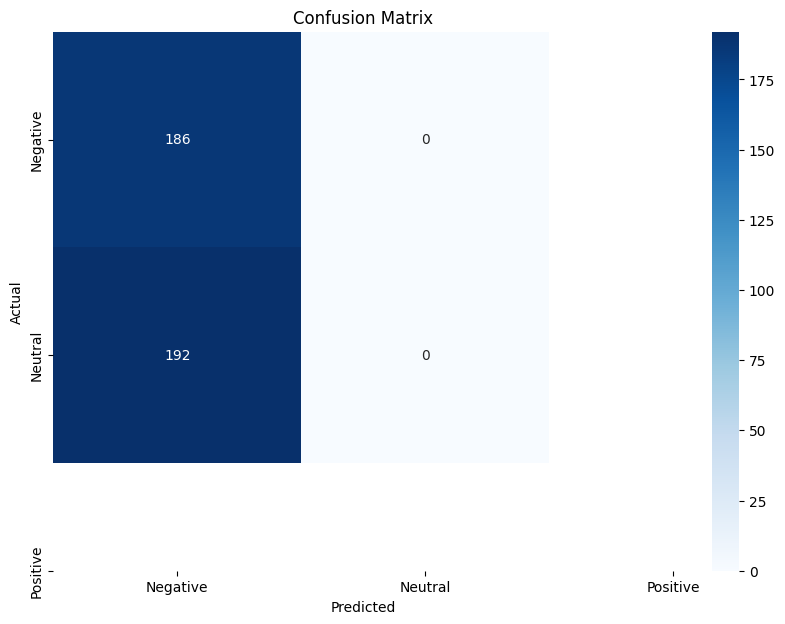


Accuracy: 0.49


In [4]:
import pandas as pd
import re
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



# Load FinBERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

# Function to get sentiment
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return torch.argmax(probs, dim=1).item()

# Predict sentiments for train and test datasets
train_labels = [get_sentiment(headline) for headline in train_headlines]
test_labels = [get_sentiment(headline) for headline in test_headlines]

# True labels
y_train_true = train['Label'].tolist()
y_test_true = test['Label'].tolist()

# Print results
print("Training set shape:", len(train_headlines))
print("Testing set shape:", len(test_headlines))

# Print a sample of the preprocessed headlines and their predicted sentiments
print("\nSample of preprocessed headlines and predicted sentiments (train):")
for i in range(2):
    print(f"Headline: {train_headlines[i]}")
    print(f"Predicted Sentiment: {train_labels[i]}")

print("\nSample of preprocessed headlines and predicted sentiments (test):")
for i in range(2):
    print(f"Headline: {test_headlines[i]}")
    print(f"Predicted Sentiment: {test_labels[i]}")

# Compute and print confusion matrix and classification report
print("\nConfusion Matrix (test):")
cm = confusion_matrix(y_test_true, test_labels)
print(cm)

print("\nClassification Report (test):")
print(classification_report(y_test_true, test_labels))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test_true, test_labels)
print(f"\nAccuracy: {accuracy:.2f}")


In [4]:
import pandas as pd
import re
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import logging


# Suppress specific warning messages
warnings.filterwarnings("ignore")


# Set logging level for transformers and other libraries
logging.basicConfig(level=logging.ERROR)


# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class NewsDataset(Dataset):
    def __init__(self, headlines, labels, tokenizer, max_len):
        self.headlines = headlines
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, item):
        headline = str(self.headlines[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            headline,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,  # Explicitly specify truncation
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'headline_text': headline,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(headlines, labels, tokenizer, max_len, batch_size):
    ds = NewsDataset(
        headlines=headlines,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )

BATCH_SIZE = 16
MAX_LEN = 128
EPOCHS = 15
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_data_loader = create_data_loader(train_headlines, y_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_headlines, y_test, tokenizer, MAX_LEN, BATCH_SIZE)

# Model
class NewsClassifier(nn.Module):
    def __init__(self, n_classes):
        super(NewsClassifier, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=n_classes)

    def forward(self, input_ids, attention_mask):
        return self.bert(input_ids=input_ids, attention_mask=attention_mask)

model = NewsClassifier(n_classes=3)
model = model.to(device)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# Evaluation function
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)
            loss = loss_fn(outputs.logits, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)



# Training loop
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_headlines)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        test_data_loader,
        loss_fn,
        device,
        len(test_headlines)
    )

    print(f'Val loss {val_loss} accuracy {val_acc}')
    print()

# Evaluation on test set
y_test_pred = []
y_test_true = []

with torch.no_grad():
    for d in test_data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)

        y_test_pred.extend(preds)
        y_test_true.extend(labels)

y_test_pred = torch.stack(y_test_pred).cpu()
y_test_true = torch.stack(y_test_true).cpu()

# Compute and print confusion matrix and classification report
print("\nConfusion Matrix (test):")
cm = confusion_matrix(y_test_true, y_test_pred)
print(cm)

print("\nClassification Report (test):")
print(classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test_true, y_test_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: name 'device' is not defined

In [8]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.7/857.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 113.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 114.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
----------
Train loss 0.698147775271 accuracy 0.4906065485775631
Val loss 0.6929163113236427 accuracy 0.5238095238095237
Epoch 2/15
----------
Train loss 0.696526922731318 accuracy 0.5185185185185185
Val loss 0.6905028894543648 accuracy 0.5264550264550264
Epoch 3/15
----------
Train loss 0.6930388258053706 accuracy 0.5201288244766505
Val loss 0.6832251946131388 accuracy 0.664021164021164
Epoch 4/15
----------
Train loss 0.7003377716765444 accuracy 0.5147611379495437
Val loss 0.6732508639494578 accuracy 0.6507936507936507
Epoch 5/15
----------
Train loss 0.67644751097402 accuracy 0.5823939881910897
Val loss 0.586282360057036 accuracy 0.7169312169312169
Epoch 6/15
----------
Train loss 0.5960103303958209 accuracy 0.6859903381642513
Val loss 0.5238761504491171 accuracy 0.746031746031746
Epoch 7/15
----------
Train loss 0.4914994103531552 accuracy 0.7702630166398282
Val loss 0.45710839952031773 accuracy 0.7936507936507936
Epoch 8/15
----------
Train loss 0.40147194884016985 accu

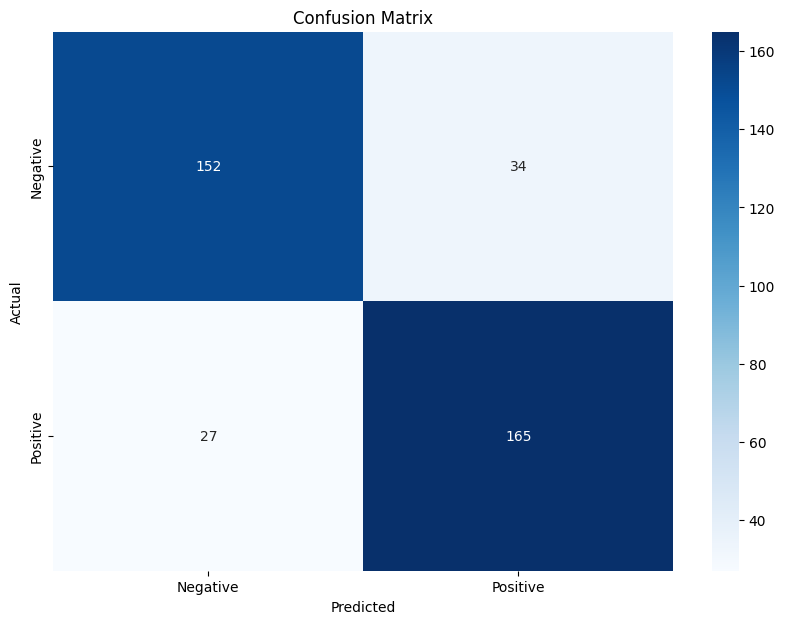


Accuracy: 0.84


In [3]:
import pandas as pd
import re
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import logging


# Suppress specific warning messages
warnings.filterwarnings("ignore")


# Set logging level for transformers and other libraries
logging.basicConfig(level=logging.ERROR)


# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class NewsDataset(Dataset):
    def __init__(self, headlines, labels, tokenizer, max_len):
        self.headlines = headlines
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, item):
        headline = str(self.headlines[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            headline,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,  # Explicitly specify truncation
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'headline_text': headline,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(headlines, labels, tokenizer, max_len, batch_size):
    ds = NewsDataset(
        headlines=headlines,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )

BATCH_SIZE = 16
MAX_LEN = 128

train_data_loader = create_data_loader(train_headlines, y_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_headlines, y_test, tokenizer, MAX_LEN, BATCH_SIZE)

# Define device here, before it is used
EPOCHS = 15
PATIENCE = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Model
class NewsClassifier(nn.Module):
    def __init__(self, n_classes):
        super(NewsClassifier, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=n_classes)

    def forward(self, input_ids, attention_mask):
        return self.bert(input_ids=input_ids, attention_mask=attention_mask)

model = NewsClassifier(n_classes=2)
model = model.to(device)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=1e-5)

# Define the total number of training steps
total_steps = len(train_data_loader) * EPOCHS

# Define the learning rate scheduler with a warm-up period
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),  # Warm-up for 10% of the steps
    num_training_steps=total_steps
)

# Define the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# Evaluation function
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)
            loss = loss_fn(outputs.logits, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

EPOCHS = 15
PATIENCE = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_loss = float('inf')
best_accuracy = 0
best_model = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_headlines)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        test_data_loader,
        loss_fn,
        device,
        len(test_headlines)
    )

    print(f'Val loss {val_loss} accuracy {val_acc}')

    # Check for early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        best_accuracy = val_acc
        best_model = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= PATIENCE:
        print("Early stopping triggered")
        break

# Load the best model
model.load_state_dict(best_model)

# Evaluation on test set
y_test_pred = []
y_test_true = []

with torch.no_grad():
    for d in test_data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)

        y_test_pred.extend(preds)
        y_test_true.extend(labels)

y_test_pred = torch.stack(y_test_pred).cpu()
y_test_true = torch.stack(y_test_true).cpu()

# Compute and print confusion matrix and classification report
print("\nConfusion Matrix (test):")
cm = confusion_matrix(y_test_true, y_test_pred)
print(cm)

print("\nClassification Report (test):")
print(classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test_true, y_test_pred)
print(f"\nAccuracy: {accuracy:.2f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/15
----------
Train loss 0.7386091239431984 accuracy 0.5050993022007515
Val loss 0.6943217664957047 accuracy 0.49206349206349204
Epoch 2/15
----------
Train loss 0.7277947190480355 accuracy 0.5131508319914116
Val loss 0.6952808499336243 accuracy 0.4973544973544973
Epoch 3/15
----------
Train loss 0.7234637380665184 accuracy 0.5067096081588836
Val loss 0.6943924427032471 accuracy 0.5211640211640212
Epoch 4/15
----------
Train loss 0.7324847950894608 accuracy 0.512614063338701
Val loss 0.6935920814673106 accuracy 0.47619047619047616
Epoch 5/15
----------
Train loss 0.7385958361829448 accuracy 0.5056360708534622
Val loss 0.6899332776665688 accuracy 0.5317460317460317
Epoch 6/15
----------
Train loss 0.7173202858011947 accuracy 0.5265700483091788
Val loss 0.6733886549870173 accuracy 0.5714285714285714
Epoch 7/15
----------
Train loss 0.6819567782247168 accuracy 0.5775630703166935
Val loss 0.657921535273393 accuracy 0.5873015873015872
Epoch 8/15
----------
Train loss 0.6300198835694

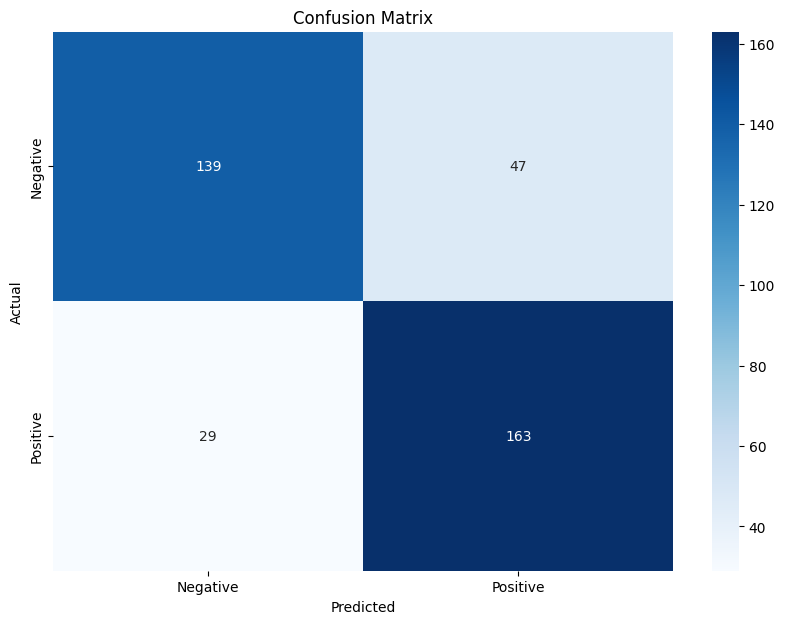


Accuracy: 0.80


In [2]:
import pandas as pd
import re
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import logging


# Suppress specific warning messages
warnings.filterwarnings("ignore")


# Set logging level for transformers and other libraries
logging.basicConfig(level=logging.ERROR)


# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class NewsDataset(Dataset):
    def __init__(self, headlines, labels, tokenizer, max_len):
        self.headlines = headlines
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, item):
        headline = str(self.headlines[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            headline,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,  # Explicitly specify truncation
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'headline_text': headline,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(headlines, labels, tokenizer, max_len, batch_size):
    ds = NewsDataset(
        headlines=headlines,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )

BATCH_SIZE = 16
MAX_LEN = 128

train_data_loader = create_data_loader(train_headlines, y_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_headlines, y_test, tokenizer, MAX_LEN, BATCH_SIZE)


EPOCHS = 15
PATIENCE = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model
class NewsClassifier(nn.Module):
    def __init__(self, n_classes):
        super(NewsClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(p=0.3)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        cls_output = outputs.pooler_output
        x = self.dropout(cls_output)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        return self.fc2(x)


model = NewsClassifier(n_classes=2)
model = model.to(device)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=1e-5)

# Define the total number of training steps
total_steps = len(train_data_loader) * EPOCHS

# Define the learning rate scheduler with a warm-up period
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),  # Warm-up for 10% of the steps
    num_training_steps=total_steps
)

# Define the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# Evaluation function
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)


best_loss = float('inf')
best_accuracy = 0
best_model = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_headlines)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        test_data_loader,
        loss_fn,
        device,
        len(test_headlines)
    )

    print(f'Val loss {val_loss} accuracy {val_acc}')

    # Check for early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        best_accuracy = val_acc
        best_model = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= PATIENCE:
        print("Early stopping triggered")
        break

# Load the best model
model.load_state_dict(best_model)

# Evaluation on test set
y_test_pred = []
y_test_true = []

with torch.no_grad():
    for d in test_data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)

        y_test_pred.extend(preds)
        y_test_true.extend(labels)

y_test_pred = torch.stack(y_test_pred).cpu()
y_test_true = torch.stack(y_test_true).cpu()

# Compute and print confusion matrix and classification report
print("\nConfusion Matrix (test):")
cm = confusion_matrix(y_test_true, y_test_pred)
print(cm)

print("\nClassification Report (test):")
print(classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test_true, y_test_pred)
print(f"\nAccuracy: {accuracy:.2f}")
